<a href="https://colab.research.google.com/github/ihsanalhafiz/annda/blob/main/Lab1a_ANNDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.1.1 Generation of linearly-separable data

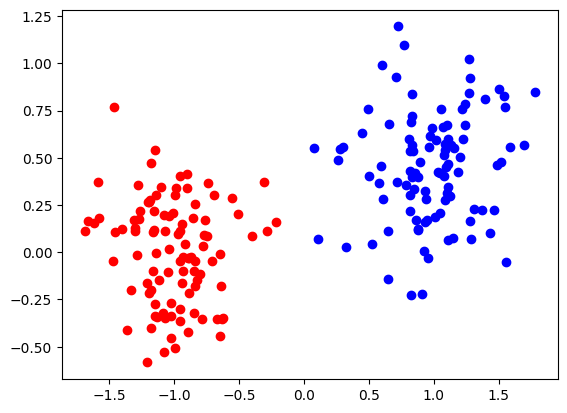

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# generate data for perceptron classification
n = 100
mA = np.array([1.0, 0.5])
sigmaA = 0.3
mB = np.array([-1.0, 0.0])
sigmaB = 0.3

classA = np.zeros((2, n))
classB = np.zeros((2, n))

classA[0, :] = np.random.randn(n) * sigmaA + mA[0]
classA[1, :] = np.random.randn(n) * sigmaA + mA[1]
classB[0, :] = np.random.randn(n) * sigmaB + mB[0]
classB[1, :] = np.random.randn(n) * sigmaB + mB[1]

# plot the data
plt.plot(classA[0, :], classA[1, :], 'bo')
plt.plot(classB[0, :], classB[1, :], 'ro')
plt.show()


### 3.1.2 Classification with a single-layer perceptron and analysis

#### Initial Decision Boundary

[0.1 0.2]


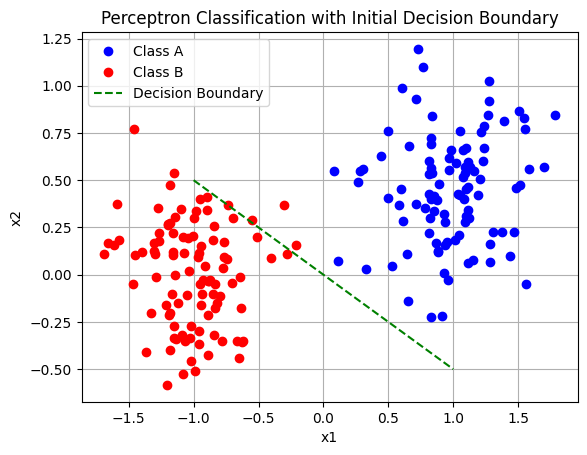

In [42]:

# make intial weights
w =  np.array([0.1, 0.2])
print(w)
eta = 0.01 # learning rate
w0 = 0 # bias

# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Initial Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

#### classifying the data using perceptron

[-0.31086611  0.02899716]
0.0


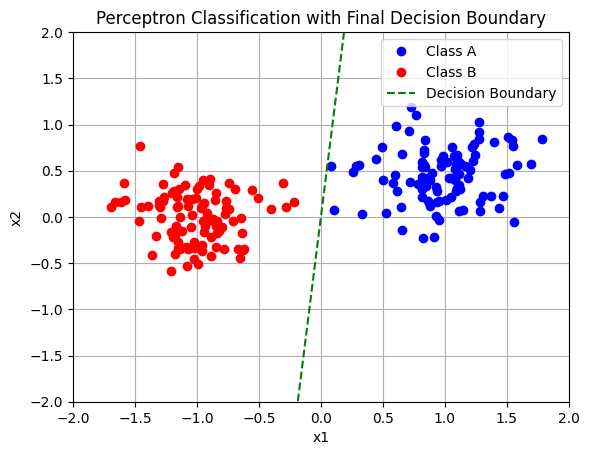

In [43]:
w_matrix = np.array([0.1, 0.2, 0.1])
eta = 0.1  # learning rate
epochs = 50

for epoch in range(epochs):
    for i in range(n):
        x_matrix = np.array([classA[0, i], classA[1, i], 1])
        y_quot = np.dot(w_matrix, x_matrix)
        y = 1 if y_quot > 0 else 0
        tA = 0
        delta_w = eta * (tA - y) * x_matrix
        w_matrix = w_matrix + delta_w        
        
        x_matrix = np.array([classB[0, i], classB[1, i], 1])
        y_quot = np.dot(w_matrix, x_matrix)
        y = 1 if y_quot > 0 else 0
        tB = 1
        delta_w = eta * (tB - y) * x_matrix
        w_matrix = w_matrix + delta_w

w = w_matrix[:2]
w0 = w_matrix[2]       

print(w)
print(w0)
# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Final Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()

#### classifying the data using delta rule online learning

Final weights: [-0.86177657 -0.23502473]
Final bias: 0.06314441882203793


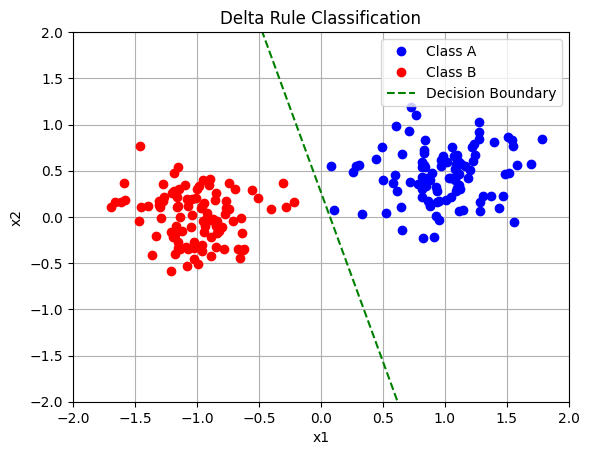

In [44]:
# Initialize weights and bias
# We'll store them in a single array of size 3: [w1, w2, bias]
w_matrix = np.array([0.1, 0.2, -0.1])
eta = 0.1  # learning rate

epochs = 5

# Delta rule training loop
for epoch in range(epochs):
    for i in range(n):
        # --- Update for Class A (target = -1) ---
        xA = np.array([classA[0, i], classA[1, i], 1.0])  # include bias input as 1
        yA = np.dot(w_matrix, xA)                         # linear output
        tA = -1                                            # target for class A
        delta_wA = eta * (tA - yA) * xA
        w_matrix += delta_wA
        
        # --- Update for Class B (target = 1) ---
        xB = np.array([classB[0, i], classB[1, i], 1.0])
        yB = np.dot(w_matrix, xB) 
        tB = 1
        delta_wB = eta * (tB - yB) * xB
        w_matrix += delta_wB

# Extract final weights and bias
w_deltarule = w_matrix[:2]
w0_deltarule = w_matrix[2]

print("Final weights:", w_deltarule)
print("Final bias:", w0_deltarule)

# Plot the data again
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-2, 2, 200)
if w_deltarule[1] != 0:  # Avoid division by zero
    # Decision boundary given by w1*x + w2*y + bias = 0  =>  y = -bias/w2 - (w1/w2)*x
    y_vals = -(w_deltarule[0] / w_deltarule[1]) * x_vals - (w0_deltarule / w_deltarule[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Delta Rule Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


#### Delta Rule with batch learning


Final weights: [-4899276.81327877 -1185203.28467453]
Final bias: -410214.0700214622


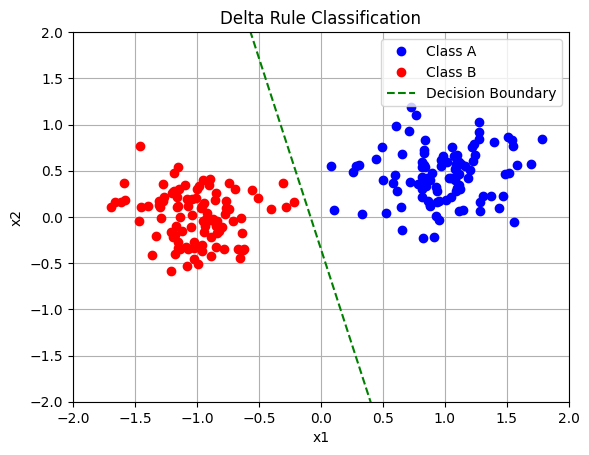

In [45]:
# Initialize weights and bias
# We'll store them in a single array of size 3: [w1, w2, bias]
w_matrix = np.array([0.1, 0.2, -0.1])
eta = 0.1  # learning rate

epochs = 5

# Delta rule training loop
for epoch in range(epochs):
    W_accum = np.zeros(3)
    for i in range(n):
        # --- Update for Class A (target = -1) ---
        xA = np.array([classA[0, i], classA[1, i], 1.0])  # include bias input as 1
        yA = np.dot(w_matrix, xA)                         # linear output
        tA = -1                                            # target for class A
        delta_wA = eta * (tA - yA) * xA
        W_accum += delta_wA
        
        # --- Update for Class B (target = 1) ---
        xB = np.array([classB[0, i], classB[1, i], 1.0])
        yB = np.dot(w_matrix, xB) 
        tB = 1
        delta_wB = eta * (tB - yB) * xB
        W_accum += delta_wB
    w_matrix += W_accum

# Extract final weights and bias
w_deltarule = w_matrix[:2]
w0_deltarule = w_matrix[2]

print("Final weights:", w_deltarule)
print("Final bias:", w0_deltarule)

# Plot the data again
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-2, 2, 200)
if w_deltarule[1] != 0:  # Avoid division by zero
    # Decision boundary given by w1*x + w2*y + bias = 0  =>  y = -bias/w2 - (w1/w2)*x
    y_vals = -(w_deltarule[0] / w_deltarule[1]) * x_vals - (w0_deltarule / w_deltarule[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Delta Rule Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


#### Compare sequential and batch learning for the delta rule

### 3.1.3 Classification of samples that are not linearly separable

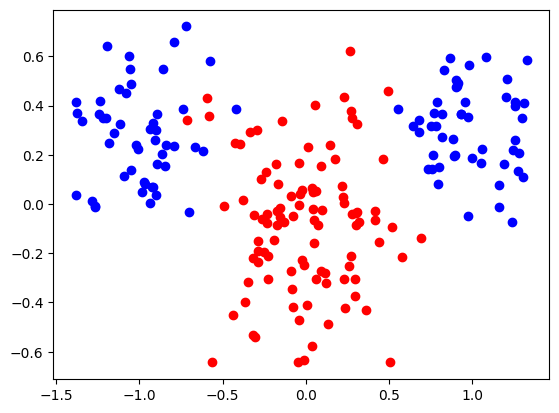

In [46]:
import numpy as np
import matplotlib.pyplot as plt

ndata = 100
mA = np.array([1.0, 0.3])
sigmaA = 0.2
mB = np.array([0.0, -0.1])
sigmaB = 0.3

# Initialize classA and classB
classA = np.zeros((2, ndata))
classB = np.zeros((2, ndata))

# classA - First dimension: half shifted negatively, half shifted positively
classA[0, :] = np.concatenate((
    np.random.randn(round(0.5 * ndata)) * sigmaA - mA[0],
    np.random.randn(round(0.5 * ndata)) * sigmaA + mA[0]
))

# classA - Second dimension
classA[1, :] = np.random.randn(ndata) * sigmaA + mA[1]

# classB - First and second dimensions
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]

# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo')
plt.plot(classB[0, :], classB[1, :], 'ro')
plt.show()


## Left over code

[-0.04577691 -0.03818653]


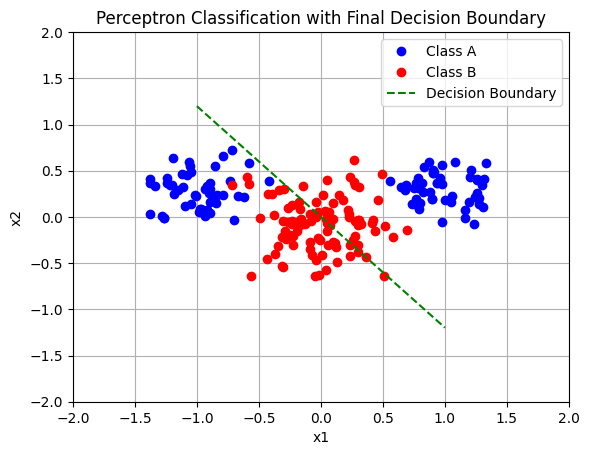

In [47]:
# first perceptron
epochs = 50
for epoch in range(epochs):
    for i in range(n):
        y_quot = classA[0, i] * w[0] + classA[1, i] * w[1] - w0
        y = 1 if y_quot > 0 else 0
        if y == 1:
            w = w - eta * np.array([classA[0, i], classA[1, i]])
        
        y_quot = classB[0, i] * w[0] + classB[1, i] * w[1] - w0
        y = 1 if y_quot > 0 else 0
        if y == 0:
            w = w + eta * np.array([classB[0, i], classB[1, i]])

print(w)
# Plot the data
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-1, 1, 100)  # Range of x values
if w[1] != 0:  # Avoid division by zero
    y_vals = -(w[0] / w[1]) * x_vals + (w0 / w[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Perceptron Classification with Final Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


Final weights: [-0.25058124 -2.14027488]
Final bias: 0.1824914322015822


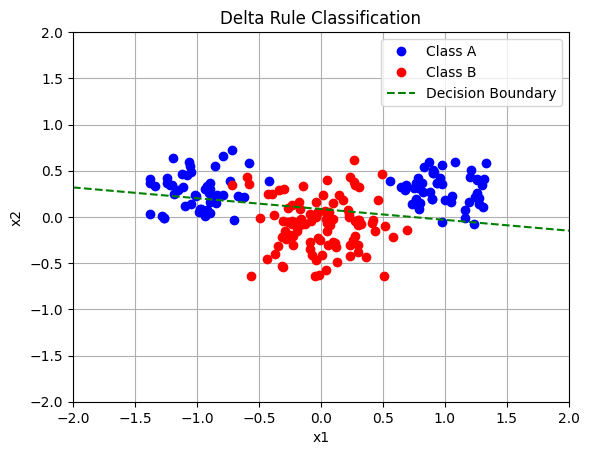

In [48]:
# Suppose you have classA.shape == (2, n) and classB.shape == (2, n).
# Flatten them to shape (n, 2) and stack:
A = classA.T  # shape (n,2)
B = classB.T  # shape (n,2)

X = np.vstack([A, B])         # shape (2n, 2)
T = np.hstack([np.ones(n)*-1.0,   # Class A => 0
               np.ones(n)])   # Class B => 1

# Initialize weights and bias
# We'll store them in a single array of size 3: [w1, w2, bias]
w_matrix = np.array([0.1, 0.2, -0.2])
eta = 0.1  # learning rate

epochs = 50

for epoch in range(epochs):
    idx = np.random.permutation(2*n)  # shuffle
    X = X[idx]
    T = T[idx]
    
    # now do incremental (“online”) updates
    for i in range(2*n):
        x_i = np.array([X[i, 0], X[i, 1], 1.0])  # includes bias=1
        y_i = np.dot(w_matrix, x_i)              # linear output
        t_i = T[i]                               # 0 or 1
        error = t_i - y_i
        delta_w = eta * np.dot(error, x_i)
        w_matrix += delta_w

# Extract final weights and bias
w_deltarule = w_matrix[:2]
w0_deltarule = w_matrix[2]

print("Final weights:", w_deltarule)
print("Final bias:", w0_deltarule)

# Plot the data again
plt.plot(classA[0, :], classA[1, :], 'bo', label="Class A")
plt.plot(classB[0, :], classB[1, :], 'ro', label="Class B")

# Define the decision boundary
x_vals = np.linspace(-2, 2, 200)
if w_deltarule[1] != 0:  # Avoid division by zero
    # Decision boundary given by w1*x + w2*y + bias = 0  =>  y = -bias/w2 - (w1/w2)*x
    y_vals = -(w_deltarule[0] / w_deltarule[1]) * x_vals - (w0_deltarule / w_deltarule[1])
    plt.plot(x_vals, y_vals, 'g--', label="Decision Boundary")

plt.legend()
plt.title("Delta Rule Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()
